## <font color=FF4455>PCA for OSA</font>


### Dependencies

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

### Load Data

In [4]:
def read_data(xlsx_data):
    """
    Reads xlsx file, separates features from variables, and normalizes the data.
    """
    df = pd.read_excel(xlsx_data)
    # Define feature matrix (X) and target variable (y)
    if 'Patient' in df.columns:
        X = df.drop('Patient', axis=1)
    columns_of_interest = ['Weight','Height','Age','Cervical','BMI']
    return X[columns_of_interest]

In [5]:
X = read_data('../datasets/Clinical_data.xlsx')

### Useful functions

In [6]:
def scale_and_fit_pca(X, n_components):
    """
    Scales the dataset and fits a PCA model for a given number of components.
    Also calculates the reconstruction error.
    """
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Calculate reconstruction error
    X_reconstructed = pca.inverse_transform(X_pca)
    error = np.mean((X_scaled - X_reconstructed) ** 2)
    
    return X_pca, pca, error

In [7]:
def plot_explained_variance(pca, n_components):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Principal Components')
    plt.show()

In [8]:
def plot_cumulative_explained_variance(pca, n_components):
    plt.figure(figsize=(10, 6))
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, n_components + 1), explained_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.grid()
    plt.show()

In [9]:
def plot_principal_components(features, *components):
    n_components = len(components)
    plt.figure(figsize=(5 * n_components, 5))
    
    for i, component in enumerate(components, 1):
        plt.subplot(1, n_components, i)
        plt.barh(features, component)
        plt.title(f"PC{i}")
    
    plt.show()

In [10]:
def plot_pca_projection(X_pca):
    # Plot the projection
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Projection of Data in Principal Component Space')
    plt.grid()
    plt.show()

def plot_pca_3d_projection(X_pca):
    # Plot the projection
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.7)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('Projection of Data in Principal Component Space')
    plt.show()

In [11]:
def biplot(X_pca, pca, features, pc1=1, pc2=2):
    """
    Creates a biplot for the first two principal components.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot the PCA projection
    plt.scatter(X_pca[:, pc1-1], X_pca[:, pc2-1], alpha=0.7, label='Data points')
    
    # Plot the loading vectors
    for i, feature in enumerate(features):
        plt.arrow(0, 0, pca.components_[pc1-1, i], pca.components_[pc2-1, i], 
                  color='r', alpha=0.5, head_width=0.05)
        plt.text(pca.components_[pc1-1, i] * 1.15, pca.components_[pc2-1, i] * 1.15, 
                 feature, color='g', ha='center', va='center')
    
    plt.xlabel(f'Principal Component {pc1}')
    plt.ylabel(f'Principal Component {pc2}')
    plt.title('Biplot')
    plt.grid()
    plt.legend()
    plt.show()

### Fitting the model

1.0622223759948088e-30


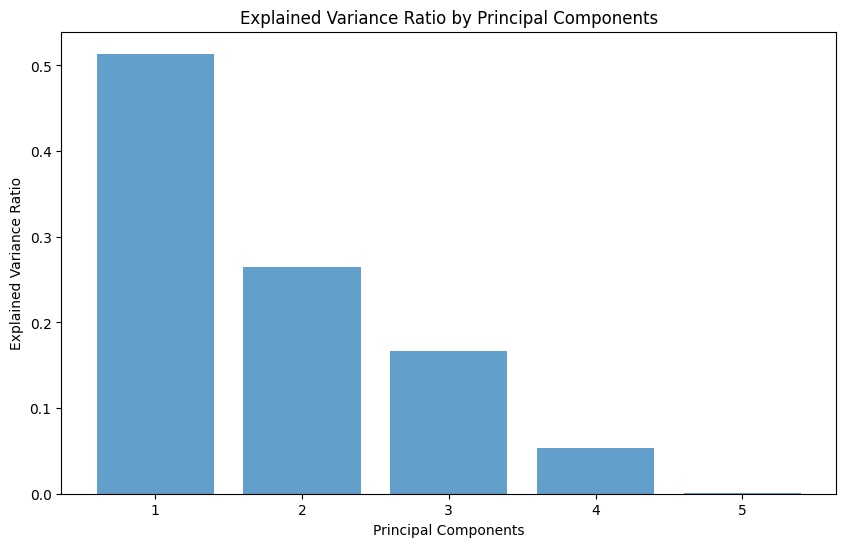

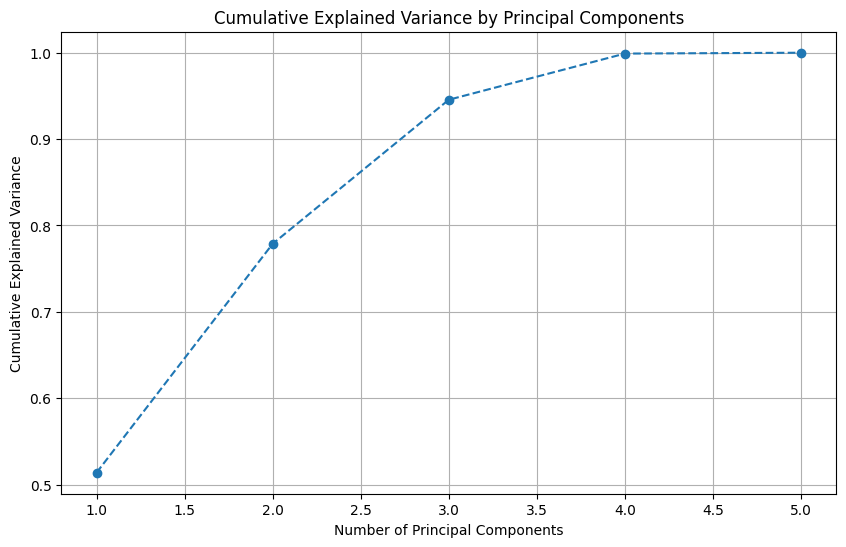

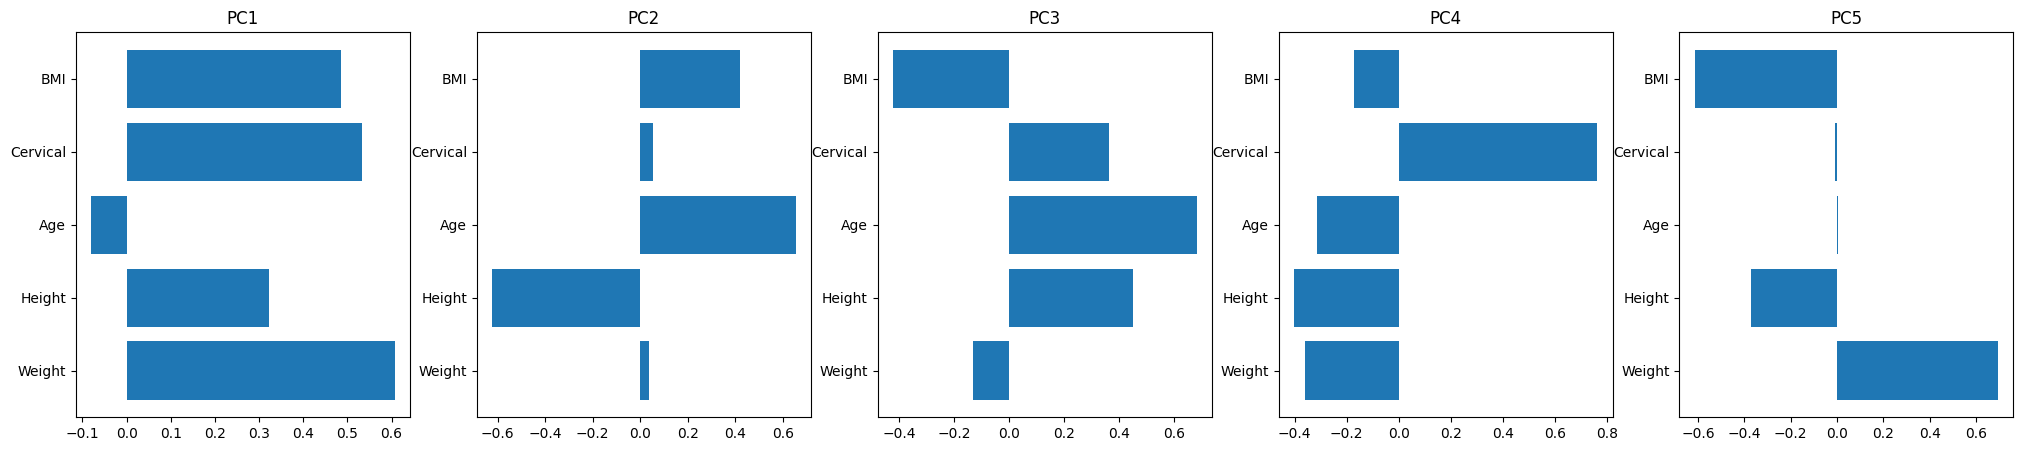

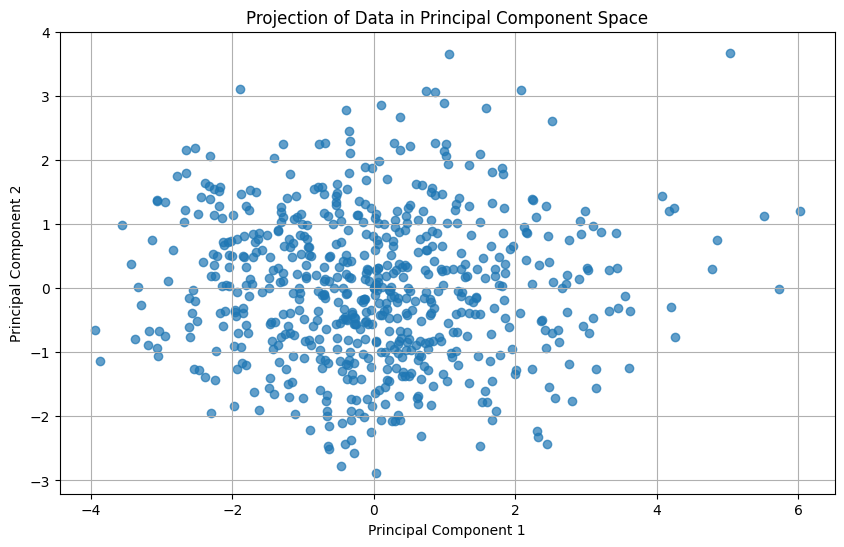

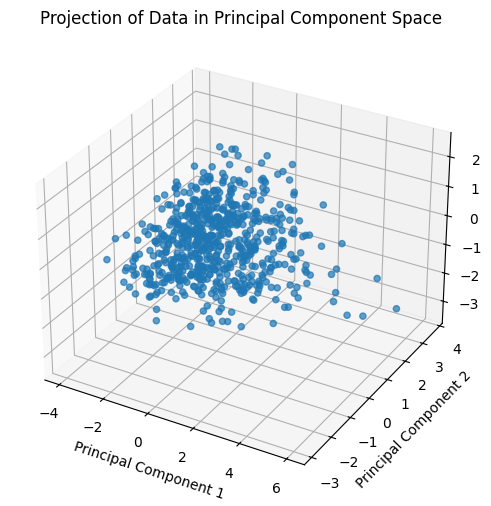

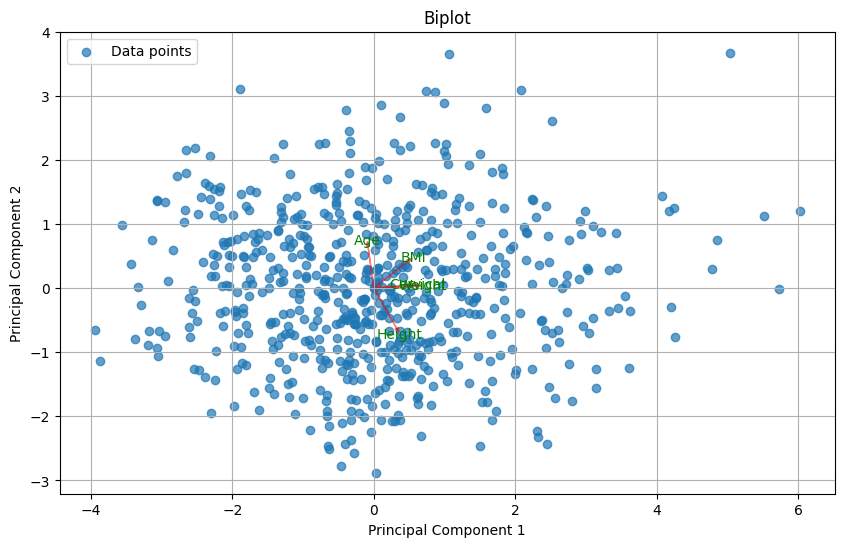

In [12]:
# Fit PCA with 5 components
n_components = 5
X_pca, pca, error = scale_and_fit_pca(X, n_components)
print(error)

# Plot explained variance
plot_explained_variance(pca, n_components)

# Plot cumulative explained variance
plot_cumulative_explained_variance(pca, n_components)

# Plot principal components
plot_principal_components(X.columns, *pca.components_[:n_components])

# Plot PCA projection (2D)
plot_pca_projection(X_pca)

# Plot PCA projection (3D)
plot_pca_3d_projection(X_pca)

# Create biplot for the first two principal components
biplot(X_pca, pca, X.columns)